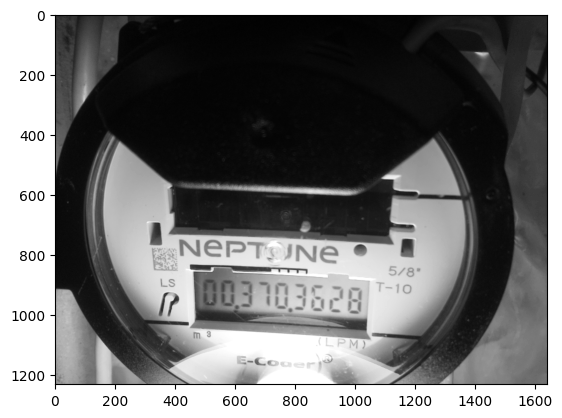

In [206]:
from imp import reload
from matplotlib import pyplot as plt
import numpy as np
import os
import subprocess
import shlex
import cv2
import analyze
reload(analyze)

import os 
dir_path = os.path.abspath('')

img_file = 'data/003705566.jpeg'
#img_file = 'data/003781217.jpeg'

img_orig = cv2.imread(img_file)
img_orig = cv2.rotate(img_orig, cv2.ROTATE_180)
img = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

[array([1174,  916,   14]), array([ 910, 1146,   15])]


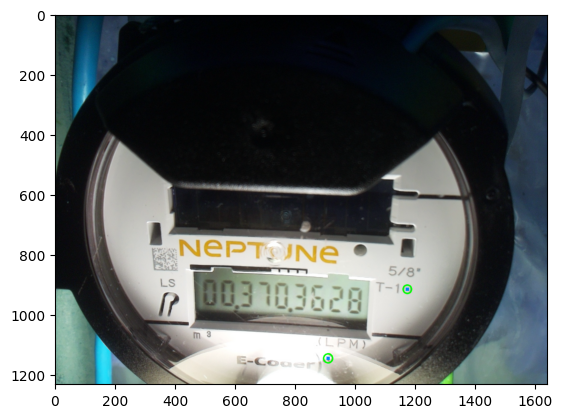

In [216]:

reload(analyze)
circles = analyze.find_circles(img)

print(circles)
output = img_orig.copy()
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    #
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    plt.imshow(output)



True

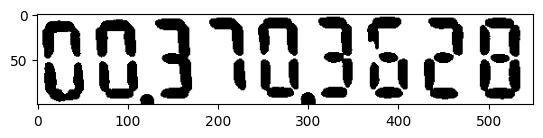

In [217]:
reload(analyze)
img2 = analyze.simplify(circles, img)
plt.imshow(img2, cmap='gray')
outname  = 'out.png'
cv2.imwrite(outname, img2)

In [210]:
cmd = f'./ssocr -d -1 -i 1 -n 2 {outname}'
result = subprocess.check_output(shlex.split(cmd)).strip()
print(result)

CalledProcessError: Command '['./ssocr', '-d', '-1', '-i', '1', '-n', '2', 'out.png']' returned non-zero exit status 2.